In [50]:
#Python Warning off
import warnings
warnings.filterwarnings('ignore')

# #TF warning off
# import tensorflow as tf
# tf.compat.v2.logging.set_verbosity(tf.compat.v2.logging.ERROR)

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [52]:
import tensorflow as tf

In [53]:
from tensorflow import keras

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
X_train_full.shape

(60000, 28, 28)

In [57]:
X_train_full.dtype

dtype('uint8')

In [58]:
np.set_printoptions(linewidth=1000)

In [59]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [60]:
y_train_full[0]

5

In [61]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0

In [62]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [63]:
X_test = X_test / 255.0

(-0.5, 27.5, 27.5, -0.5)

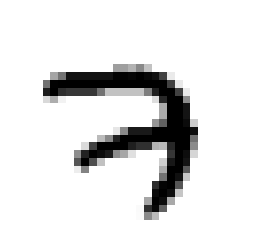

In [64]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')

In [65]:
y_train[0]
# f = 7

7

In [66]:
X_valid.shape


(5000, 28, 28)

In [67]:
X_test.shape


(10000, 28, 28)

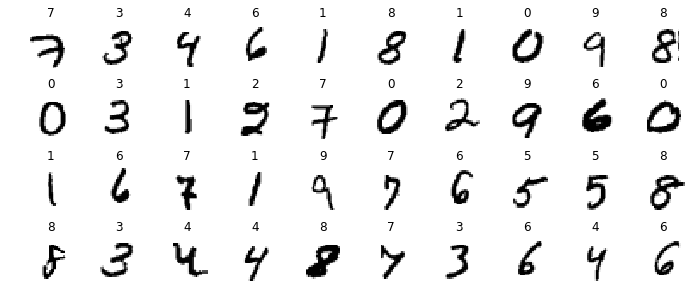

In [68]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows): 
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [69]:
K = keras.backend
#  callback 상속 재정의
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr)) # learning rate 얻어서 rates 추가
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr*self.factor)

In [70]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), #28*28 을 784로 펴준다
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [41]:
expon_lr = ExponentialLearningRate(factor=1.005)

In [42]:
hist = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid,y_valid),
                callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 5s 83us/sample - loss: nan - accuracy: 0.5799 - val_loss: nan - val_accuracy: 0.0958


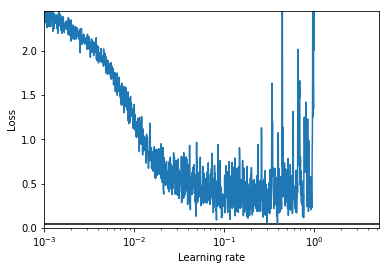

In [47]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates),max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

In [48]:
import os
run_index =1
run_logdir = os.path.join(os.curdir, "my_mnist_logs","run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'